In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.205742
Fare        0.002392
dtype: float64

In [4]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [6]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  184.70402996695034
Age Variance after 99 wala imputation:  968.5613452410495
Age Variance after -1 wala imputation:  300.55681376346405
Original Fare variable variance:  2333.007047160699
Fare Variance after 999 wala imputation:  5116.048723270864
Fare Variance after -1 wala imputation:  2329.5983519414503


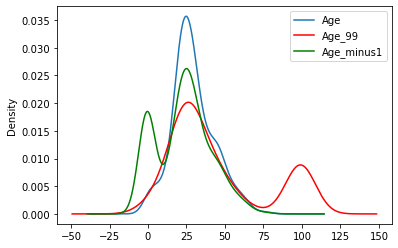

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

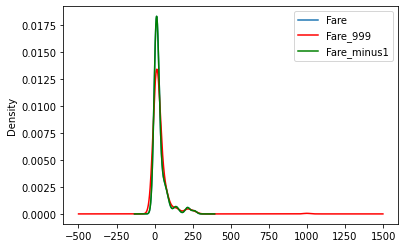

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [9]:
X_train.cov()

,Age,Fare,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,184.704030,216.034928,184.704030,184.704030,329.903030,210.390585
Fare,216.034928,2333.007047,-140.324900,303.019689,2333.007047,2333.007047
Age_99,184.704030,-140.324900,968.561345,-213.474583,-93.030550,-141.586591
Age_minus1,184.704030,303.019689,-213.474583,300.556814,411.474158,298.182723
Fare_999,329.903030,2333.007047,-93.030550,411.474158,5116.048723,2225.817550
Fare_minus1,210.390585,2333.007047,-141.586591,298.182723,2225.817550,2329.598352


In [11]:
X_train.corr()

,Age,Fare,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.302479,1.000000,1.000000,0.305522,0.292374
Fare,0.302479,1.000000,-0.093247,0.363928,1.000000,1.000000
Age_99,1.000000,-0.093247,1.000000,-0.395657,-0.041792,-0.094258
Age_minus1,1.000000,0.363928,-0.395657,1.000000,0.331827,0.356352
Fare_999,0.305522,1.000000,-0.041792,0.331827,1.000000,0.644736
Fare_minus1,0.292374,1.000000,-0.094258,0.356352,0.644736,1.000000


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [14]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')


In [15]:
trf.fit(X_train)


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [16]:
trf.named_transformers_['imputer1'].statistics_


array([99.])

In [17]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [18]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [19]:
X_train

array([[2.300000e+01, 8.662500e+00],
       [2.000000e+00, 2.021250e+01],
       [3.900000e+01, 1.341670e+01],
       [2.100000e+01, 7.225000e+00],
       [3.100000e+01, 2.100000e+01],
       [8.000000e+00, 2.600000e+01],
       [9.900000e+01, 7.000000e+00],
       [3.700000e+01, 8.315830e+01],
       [1.700000e+01, 4.710000e+01],
       [3.100000e+01, 2.100000e+01],
       [8.300000e-01, 9.350000e+00],
       [9.900000e+01, 2.655000e+01],
       [2.200000e+01, 8.962500e+00],
       [9.900000e+01, 2.167920e+01],
       [2.700000e+01, 7.895800e+00],
       [2.100000e+01, 7.854200e+00],
       [4.500000e+01, 6.335830e+01],
       [2.200000e+01, 1.050000e+01],
       [9.900000e+01, 2.100000e+01],
       [3.200000e+01, 7.579200e+00],
       [9.900000e+01, 1.450000e+01],
       [2.500000e+01, 2.600000e+01],
       [2.600000e+01, 2.202500e+01],
       [2.500000e+01, 5.544170e+01],
       [9.900000e+01, 2.167920e+01],
       [4.600000e+01, 7.524170e+01],
       [3.000000e+01, 4.550000e+01],
 